### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ №6

#### Дисциплина: Интеллектуальный анализ данных

##### Студент:   Леонова Алина
##### Группа:    НФИбд-02-17

### Москва 2020
***

### Вариант №25
Ozone Level Detection Data Set  

Название файла: eighthr.data 

Ссылка: http://archive.ics.uci.edu/ml/datasets/Ozone+Level+Detection  

Класс: class (столбец No 74) 


***
#### Постановка задачи:
1.         Считайте заданный набор данных из репозитария UCI.

 

2.         Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените их на медианные значения признака. Если какие-либо числовые признаки в наборе были распознаны неверно, то преобразуйте их в числовые. Оставьте в наборе данных только числовые признаки.

 

3.         Вычислите и визуализируйте матрицу корреляций признаков. Удалите из набора признаки, имеющие высокую корреляцию (близкую к +1 или -1) с другими признаками.

 

4.         Если столбец с метками классов содержит более двух классов, то объедините некоторые классы, чтобы получить набор для бинарной классификации. Объединяйте классы таким образом, чтобы положительный и отрицательный классы были сопоставимы по количеству точек.

 

5.         Используя метод рекурсивного исключения признаков (RFE) и логистическую регрессию, определите и оставьте в наборе наиболее значимые признаки (не менее двух). Если в наборе данных осталось более двух признаков, то определите два признака с наибольшей дисперсией для визуализации.

 

6.         Масштабируйте признаки набора данных на интервал от 0 до 1.

 

7.         Используя разделение набора данных на обучающую и тестовую выборки в соотношении 70% на 30%, создайте и обучите классификаторы на основе наивного байесовского классификатора, логистической регрессии, линейного дискриминантного анализа и метода опорных векторов.

 

8.         Визуализируйте для каждого из классификаторов границу решения, подписывая оси и рисунок и создавая легенду для меток классов набора данных.

 

9.         Визуализируйте на одном рисунке ROC кривые для каждого из классификаторов, подписывая оси и рисунок и создавая легенду для методов бинарной классификации.

 

10.       Определите лучший метод бинарной классификации набора данных по показателю ROC_AUC (площади под ROC кривой).
***

**1. Считайте заданный набор данных из репозитария UCI.**

	class (столбец No 74)

In [1]:
import numpy as np
import pandas as pd

url = \
"http://archive.ics.uci.edu/ml/machine-learning-databases/ozone/eighthr.data"
data = pd.read_csv( url, header=None, prefix="V")
print(data[0:5])

         V0   V1   V2   V3   V4   V5   V6   V7   V8   V9  ...   V64    V65  \
0  1/1/1998  0.8  1.8  2.4  2.1    2  2.1  1.5  1.7  1.9  ...  0.15  10.67   
1  1/2/1998  2.8  3.2  3.3  2.7  3.3  3.2  2.9  2.8  3.1  ...  0.48   8.39   
2  1/3/1998  2.9  2.8  2.6  2.1  2.2  2.5  2.5  2.7  2.2  ...   0.6   6.94   
3  1/4/1998  4.7  3.8  3.7  3.8  2.9  3.1  2.8  2.5  2.4  ...  0.49   8.73   
4  1/5/1998  2.6  2.1  1.6  1.4  0.9  1.5  1.2  1.4  1.3  ...     ?      ?   

     V66   V67    V68   V69    V70  V71   V72  V73  
0  -1.56  5795  -12.1  17.9  10330  -55     0  0.0  
1   3.84  5805  14.05    29  10275  -55     0  0.0  
2    9.8  5790   17.9  41.3  10235  -40     0  0.0  
3  10.54  5775  31.15  51.7  10195  -40  2.08  0.0  
4      ?     ?      ?     ?      ?    ?  0.58  0.0  

[5 rows x 74 columns]


**2. Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените их на медианные значения признака. Если какие-либо числовые признаки в наборе были распознаны неверно, то преобразуйте их в числовые. Оставьте в наборе данных только числовые признаки.**

In [2]:
df = data.replace('?',np.NaN)

print( "Типы:\n", df.dtypes)
print('\nЧисло записей = %d' % (df.shape[0]))
print('Число признаков = %d' % (df.shape[1]))

print('Число отсутствующих значений:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))

Типы:
 V0      object
V1      object
V2      object
V3      object
V4      object
        ...   
V69     object
V70     object
V71     object
V72     object
V73    float64
Length: 74, dtype: object

Число записей = 2534
Число признаков = 74
Число отсутствующих значений:
	V0: 0
	V1: 299
	V2: 292
	V3: 294
	V4: 292
	V5: 293
	V6: 292
	V7: 291
	V8: 289
	V9: 290
	V10: 287
	V11: 288
	V12: 292
	V13: 287
	V14: 288
	V15: 288
	V16: 286
	V17: 284
	V18: 283
	V19: 286
	V20: 292
	V21: 294
	V22: 293
	V23: 300
	V24: 297
	V25: 273
	V26: 273
	V27: 190
	V28: 185
	V29: 187
	V30: 184
	V31: 184
	V32: 183
	V33: 183
	V34: 183
	V35: 185
	V36: 185
	V37: 188
	V38: 192
	V39: 189
	V40: 191
	V41: 192
	V42: 187
	V43: 184
	V44: 182
	V45: 184
	V46: 188
	V47: 189
	V48: 185
	V49: 192
	V50: 189
	V51: 175
	V52: 175
	V53: 99
	V54: 105
	V55: 180
	V56: 180
	V57: 95
	V58: 107
	V59: 115
	V60: 157
	V61: 157
	V62: 100
	V63: 115
	V64: 125
	V65: 210
	V66: 210
	V67: 112
	V68: 136
	V69: 125
	V70: 95
	V71: 158
	V72: 2
	V73: 0


V73 - класс, в нём нет пропущенных значений. Каждая строка набора хранит в себе дату и числовые данные. Избавляюсь от даты (V0) и конвертирую нераспознанное в числа.

In [3]:
df = df.drop(['V0'],axis=1)
for i in df.columns:
    df[[i]] = df[[i]].apply(pd.to_numeric)
print( "Типы:\n", df.dtypes)

Типы:
 V1     float64
V2     float64
V3     float64
V4     float64
V5     float64
        ...   
V69    float64
V70    float64
V71    float64
V72    float64
V73    float64
Length: 73, dtype: object


Заменяю пропущенные значения на медианные значения соответствующих признаков.

In [4]:
 print( '\nМедианные значения признаков:')
av = []
c = df.drop(['V73'],axis=1).columns
for i in c:
    av = np.nanmedian(df[i].values)
    print(i,av)
    df.fillna(value = {i:av}, inplace = True)
 
print('\nЧисло отсутствующих значений после заммены:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))


Медианные значения признаков:
V1 1.3
V2 1.3
V3 1.2
V4 1.3
V5 1.3
V6 1.3
V7 1.4
V8 1.9
V9 2.5
V10 2.8
V11 2.9
V12 2.9
V13 3.0
V14 3.0
V15 3.1
V16 3.2
V17 3.2
V18 2.9
V19 2.5
V20 2.2
V21 2.0
V22 1.7
V23 1.6
V24 1.4
V25 4.1
V26 2.2
V27 20.4
V28 20.2
V29 19.9
V30 19.85
V31 19.7
V32 19.6
V33 19.7
V34 20.4
V35 21.4
V36 22.9
V37 24.0
V38 24.8
V39 25.3
V40 25.5
V41 25.7
V42 25.6
V43 25.25
V44 24.4
V45 23.4
V46 22.5
V47 21.8
V48 21.3
V49 20.9
V50 20.7
V51 26.6
V52 22.2
V53 14.3
V54 0.64
V55 1.875
V56 1.545
V57 1535.0
V58 6.8
V59 0.38
V60 5.09
V61 0.86
V62 3153.5
V63 -10.1
V64 0.23
V65 9.25
V66 0.36
V67 5835.0
V68 14.925
V69 41.1
V70 10160.0
V71 0.0
V72 0.0

Число отсутствующих значений после заммены:
	V1: 0
	V2: 0
	V3: 0
	V4: 0
	V5: 0
	V6: 0
	V7: 0
	V8: 0
	V9: 0
	V10: 0
	V11: 0
	V12: 0
	V13: 0
	V14: 0
	V15: 0
	V16: 0
	V17: 0
	V18: 0
	V19: 0
	V20: 0
	V21: 0
	V22: 0
	V23: 0
	V24: 0
	V25: 0
	V26: 0
	V27: 0
	V28: 0
	V29: 0
	V30: 0
	V31: 0
	V32: 0
	V33: 0
	V34: 0
	V35: 0
	V36: 0
	V37: 0
	V38: 0
	V3

**3. Вычислите и визуализируйте матрицу корреляций признаков. Удалите из набора признаки, имеющие высокую корреляцию (близкую к +1 или -1) с другими признаками.**


Корреляционная матрица признаков:
            V1        V2        V3        V4        V5        V6        V7  \
V1   1.000000  0.919563  0.860405  0.802468  0.753572  0.703452  0.665626   
V2   0.919563  1.000000  0.925181  0.851380  0.802080  0.747513  0.710108   
V3   0.860405  0.925181  1.000000  0.916683  0.846544  0.786159  0.747142   
V4   0.802468  0.851380  0.916683  1.000000  0.913868  0.846335  0.789377   
V5   0.753572  0.802080  0.846544  0.913868  1.000000  0.914685  0.835782   
..        ...       ...       ...       ...       ...       ...       ...   
V68  0.097556  0.095098  0.082670  0.075753  0.072317  0.059903  0.075683   
V69  0.152418  0.145516  0.131370  0.124640  0.113367  0.103512  0.113723   
V70 -0.117625 -0.106754 -0.088396 -0.088001 -0.070416 -0.073611 -0.088436   
V71 -0.112243 -0.102185 -0.113536 -0.106731 -0.099015 -0.093575 -0.093393   
V72  0.087363  0.098844  0.092781  0.099487  0.120267  0.113232  0.105559   

           V8        V9       V10  ... 

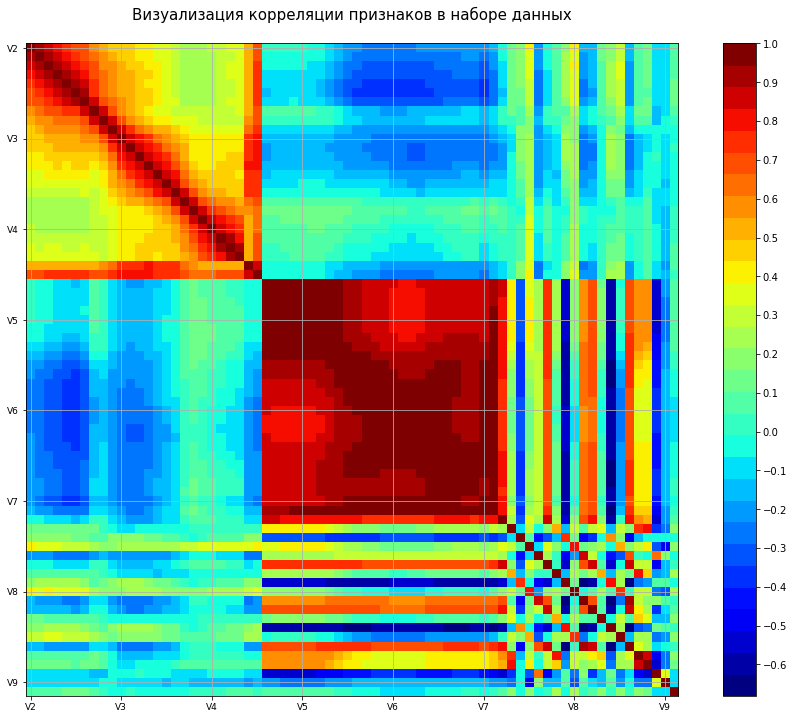

In [5]:
 def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    print('\nКорреляционная матрица признаков:\n', df.corr())
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Визуализация корреляции признаков в наборе данных\n',fontsize=15)
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=9)
    ax1.set_yticklabels(labels,fontsize=9)
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()

correlation_matrix(df.drop(['V73'],axis=1))

Удаление признаков, имеющих высокую корреляцию с другими признаками. 
Матрица симметричная так что проверяю значения только по одну сторону от главной диагонали. 
Близкими к единице считаю значения по модую большие 0.9.


Корреляционная матрица признаков:
            V1        V8        V9       V10       V11       V12       V13  \
V1   1.000000  0.596721  0.540016  0.494373  0.465033  0.439997  0.412667   
V8   0.596721  1.000000  0.850626  0.686303  0.587330  0.521795  0.466992   
V9   0.540016  0.850626  1.000000  0.832773  0.690122  0.585390  0.522380   
V10  0.494373  0.686303  0.832773  1.000000  0.864582  0.735416  0.656798   
V11  0.465033  0.587330  0.690122  0.864582  1.000000  0.881030  0.789233   
V12  0.439997  0.521795  0.585390  0.735416  0.881030  1.000000  0.878282   
V13  0.412667  0.466992  0.522380  0.656798  0.789233  0.878282  1.000000   
V14  0.384246  0.418953  0.459376  0.593868  0.720396  0.796021  0.886711   
V15  0.342636  0.377431  0.414783  0.536203  0.652353  0.728256  0.792408   
V16  0.328815  0.354447  0.385981  0.499877  0.601897  0.660232  0.720132   
V17  0.303803  0.324800  0.363696  0.458948  0.545845  0.587180  0.638262   
V18  0.255291  0.299839  0.340262  0.401

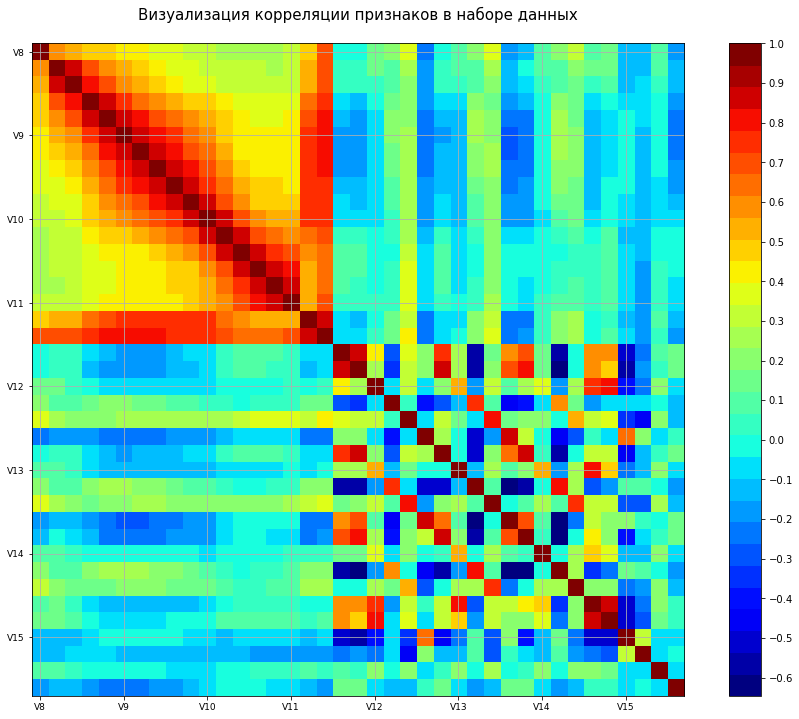

In [6]:
d = df
corm = d.corr()
l = len(d.columns)
for j in range(l):
    for i in range(l):   
        if ( (i > j) and (abs( np.array(corm)[i,j] ) > 0.9) ):
            d.drop([c[i]],axis=1,inplace=True,errors='ignore')
            #d.drop([c[j]],axis=1,inplace=True,errors='ignore')
            
correlation_matrix(d)

**4. Если столбец с метками классов содержит более двух классов, то объедините некоторые классы, чтобы получить набор для бинарной классификации. Объединяйте классы таким образом, чтобы положительный и отрицательный классы были сопоставимы по количеству точек.**

In [7]:
print( 'Количество классов = ',df['V73'].nunique() )
cl1, cl2 = 0, 0
for i in d['V73']:
    if (i == 0.0):
        cl1 += 1
    elif (i == 1.0):
        cl2 += 1
print('Количество записей классов 0 1:',cl1,cl2)

Количество классов =  2
Количество записей классов 0 1: 2374 160


Классов изначально два, так что ничего не поделать с имеющейся разницей между количеством записей классов. 

**5. Используя метод рекурсивного исключения признаков (RFE) и логистическую регрессию, определите и оставьте в наборе наиболее значимые признаки (не менее двух). Если в наборе данных осталось более двух признаков, то определите два признака с наибольшей дисперсией для визуализации.**


In [8]:
# Feature Extraction with RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
X = d.drop(['V73'],axis=1)
y = df['V73']
# feature extraction
model = LogisticRegression(max_iter=10000)
#rfe = RFE(model,n_features_to_select=2)
rfe = RFE(model)
fit = rfe.fit(X, y)

print("Число признаков: %d" % fit.n_features_)
print("\nВыбранные признаки: %s" % fit.support_)
print("\nРанг признаков: %s" % fit.ranking_)

Число признаков: 19

Выбранные признаки: [ True  True False  True  True False  True  True False False  True  True
  True  True  True  True  True False False  True False False  True False
  True  True False False False False  True False False False False False
 False  True]

Ранг признаков: [ 1  1 14  1  1  2  1  1  3 16  1  1  1  1  1  1  1 10 13  1  4  5  1 19
  1  1  9 11 18 17  1  8 12  7  6 20 15  1]


Определение двух наиболее заначимых признаков:

In [9]:
tf = np.array(fit.support_)
c = d.columns
rang1 = []
for i in range(len(c)-1):
    if (tf[i]):
        rang1.append(c[i])
print('Лучшие признаки: ', rang1)

disp = []
for i in rang1:
    disp.append(np.var(d[i]))
disp = np.array(disp)
print('Их дисперсии:', disp)

print('\nДва признака с наибольшими дисперсиями:')
m = np.argmax(disp)
print(rang1[m], disp[m])

rang1 = np.delete(rang1, m)
disp = np.delete(disp, m)

m = np.argmax(disp)
print(rang1[m], disp[m])

Лучшие признаки:  ['V1', 'V8', 'V10', 'V11', 'V13', 'V14', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V25', 'V53', 'V56', 'V58', 'V59', 'V64', 'V72']
Их дисперсии: [ 1.43847277  1.19486831  1.32236186  1.50349638  1.78249272  1.83877855
  1.45886205  1.35389556  1.36270935  1.30317768  1.28458557  1.2966313
  1.22904301 22.83733009 34.93723579 14.34633111  0.0685854   0.05921847
  1.73506768]

Два признака с наибольшими дисперсиями:
V56 34.93723578829109
V53 22.837330094845846


**6. Масштабируйте признаки набора данных на интервал от 0 до 1.**

In [10]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

X = d[['V53','V56','V73']]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
set_printoptions(precision=3)
print('Было:\n',X)

resX = pd.DataFrame(data=rescaledX, columns=['V53','V56','V73'])
resX[['V73']] = resX[['V73']].astype(int)
print('\nСтало:\n',resX)

Было:
        V53     V56  V73
0      6.7   0.140  0.0
1      9.0   9.530  0.0
2      9.0  10.170  0.0
3      9.9   8.580  0.0
4     14.3   1.545  0.0
...    ...     ...  ...
2529   5.5  -1.920  0.0
2530   5.8   4.710  0.0
2531   7.5   3.130  0.0
2532   9.3   9.760  0.0
2533  10.1   8.120  0.0

[2534 rows x 3 columns]

Стало:
            V53       V56  V73
0     0.436709  0.453055    0
1     0.509494  0.686289    0
2     0.509494  0.702186    0
3     0.537975  0.662692    0
4     0.677215  0.487953    0
...        ...       ...  ...
2529  0.398734  0.401888    0
2530  0.408228  0.566567    0
2531  0.462025  0.527322    0
2532  0.518987  0.692002    0
2533  0.544304  0.651267    0

[2534 rows x 3 columns]


**7. Используя разделение набора данных на обучающую и тестовую выборки в соотношении 70% на 30%, создайте и обучите классификаторы на основе наивного байесовского классификатора, логистической регрессии, линейного дискриминантного анализа и метода опорных векторов.**

Разделение набора

In [11]:
from sklearn.model_selection import train_test_split

test_size=0.3 # тестовая выборка 30%

X = resX.drop('V73',axis=1)
y = resX['V73']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
# random_state чтобы деление не менялось

**Наивная байесовская классификация**

In [12]:
from sklearn.naive_bayes import GaussianNB

nbc = GaussianNB()
nbc.fit(X_train,y_train);

y_pred_bayes = nbc.predict(X_test)
mislabel_b = np.sum((y_test != y_pred_bayes))
print('Ошибочно классифицированно {} из {} точки тестового множества'.format(mislabel_b,len(y_test)))
print('Точность классификации = ', nbc.score(X_test, y_test))

Ошибочно классифицированно 47 из 761 точки тестового множества
Точность классификации =  0.938239159001314


**Классификатор логистической регрессии**

In [13]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)
mislabel_lr = np.sum((y_test != y_pred_lr))
print('Ошибочно классифицированно {} из {} точки тестового множества'.format(mislabel_lr,len(y_test)))
print('Точность классификации = ', log_reg.score(X_test, y_test))

Ошибочно классифицированно 47 из 761 точки тестового множества
Точность классификации =  0.938239159001314


**Классификация методом линейного дискриминантного анализа**

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_pred_lda = lda.predict(X_test)
mislabel_lda = np.sum((y_test != y_pred_lda))
print('Ошибочно классифицированно {} из {} точки тестового множества'.format(mislabel_lda,len(y_test)))
print('Точность классификации = ', lda.score(X_test, y_test))

Ошибочно классифицированно 49 из 761 точки тестового множества
Точность классификации =  0.9356110381077529


**Классификация методом опорных векторов**

In [15]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=1e9, max_iter=1000)
svc.fit(X_train, y_train)

y_pred_svc = svc.predict(X_test)
mislabel_svc = np.sum((y_test != y_pred_svc))
print('Ошибочно классифицированно {} из {} точки тестового множества'.format(mislabel_svc,len(y_test)))
print('Точность классификации = ', svc.score(X_test, y_test))

Ошибочно классифицированно 47 из 761 точки тестового множества
Точность классификации =  0.938239159001314


c:\wintools\python\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


max_iter=1000000 будет всё ещё мало

**8. Визуализируйте для каждого из классификаторов границу решения, подписывая оси и рисунок и создавая легенду для меток классов набора данных.**

Функция для визуализации границы решения

In [16]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X = np.array(X)
def plot_decision_boundary(model, axis): 
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    custom_cmap = ListedColormap(['#90f9db','#f99590'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

    plt.scatter(X[y==0,0], X[y==0,1], color="blue", label=0)
    plt.scatter(X[y==1,0], X[y==1,1], color="red", label=1)
    plt.legend()
    plt.xlabel('V53')
    plt.ylabel('V56')
    plt.show()

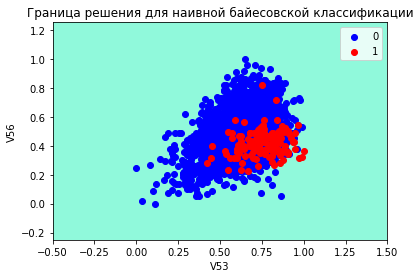

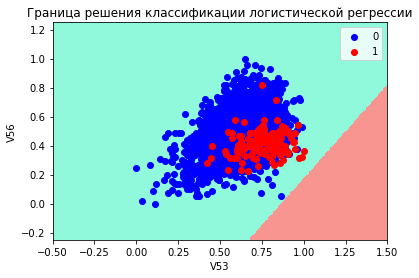

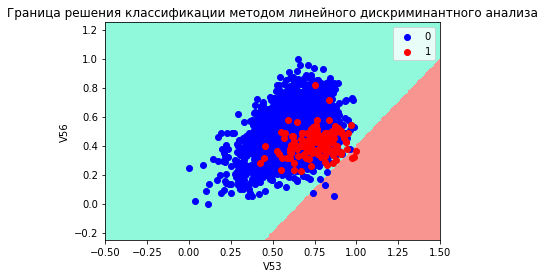

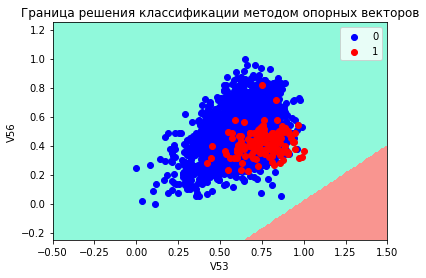

In [17]:
plt.title('Граница решения для наивной байесовской классификации')
plot_decision_boundary(nbc, axis=[-0.5, 1.5, -0.25, 1.25])

plt.title('Граница решения классификации логистической регрессии')
plot_decision_boundary(log_reg, axis=[-0.5, 1.5, -0.25, 1.25])

plt.title('Граница решения классификации методом линейного дискриминантного анализа')
plot_decision_boundary(lda, axis=[-0.5, 1.5, -0.25, 1.25])

plt.title('Граница решения классификации методом опорных векторов')
plot_decision_boundary(svc, axis=[-0.5, 1.5, -0.25, 1.25])

Выглядит несколько странно, неадекватно и дико, но точек класса 0 значительно больше, некоторые точки разных классов накладываются друг на друга, так что, вероятно, при нормальном выделении класса 1, ошибок классификации стало бы больше. 

**9. Визуализируйте на одном рисунке ROC кривые для каждого из классификаторов, подписывая оси и рисунок и создавая легенду для методов бинарной классификации.**

В GaussianNB отсутствует decision_function, вместо неё использую второй столбец predict_proba

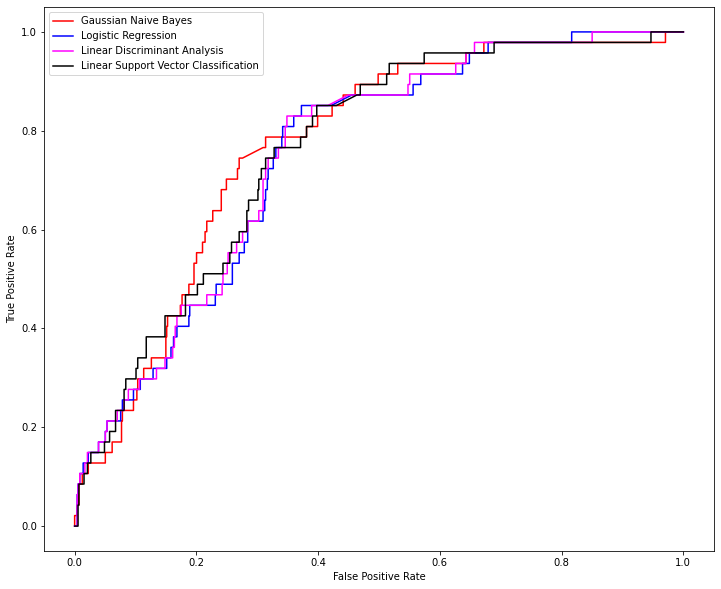

In [18]:
from sklearn.metrics import roc_curve

ds_bayes = []
bayes = nbc.predict_proba(X_test)
for i in bayes:
    ds_bayes.append(i[1])
ds_bayes = np.array(ds_bayes)

ds_lr = log_reg.decision_function(X_test)
ds_lda = lda.decision_function(X_test)
ds_svc= svc.decision_function(X_test)

fprs1, tprs1, thresholds = roc_curve(y_test, ds_bayes)
fprs2, tprs2, thresholds = roc_curve(y_test, ds_lr)
fprs3, tprs3, thresholds = roc_curve(y_test, ds_lda)
fprs4, tprs4, thresholds = roc_curve(y_test, ds_svc)

plt.figure(figsize=(12,10))
plt.plot(fprs1, tprs1, color="red", label='Gaussian Naive Bayes')
plt.plot(fprs2, tprs2, color="blue", label='Logistic Regression')
plt.plot(fprs3, tprs3, color="magenta", label='Linear Discriminant Analysis')
plt.plot(fprs4, tprs4, color="black", label='Linear Support Vector Classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

**10. Определите лучший метод бинарной классификации набора данных по показателю ROC_AUC (площади под ROC кривой).**

In [19]:
from sklearn.metrics import roc_auc_score

print('Площадь под кривой (roc_auc)')
print('\tGaussian Naive Bayes: ',roc_auc_score(y_test, ds_bayes))
print('\tLogistic Regression: ',roc_auc_score(y_test, ds_lr))
print('\tLinear Discriminant Analysis: ',roc_auc_score(y_test, ds_lda))
print('\tLinear Support Vector Classification: ',roc_auc_score(y_test, ds_svc))

Площадь под кривой (roc_auc)
	Gaussian Naive Bayes:  0.7694141486381786
	Logistic Regression:  0.7490315275046189
	Linear Discriminant Analysis:  0.7524286310268788
	Linear Support Vector Classification:  0.7613683771380892


Наибольшая площадь под COR кривой оказалась у наивного байесовского классификатора, значит он оказался лучшим.